# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [128]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [129]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [130]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby("type").count()["ride_id"]
ride_count.name = "Total Rides"
ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: Total Rides, dtype: int64

In [131]:
# 2. Get the total drivers for each city type
driver_count = city_data_df.groupby("type").sum()["driver_count"]
driver_count.name = "Total Drivers"
driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: Total Drivers, dtype: int64

In [132]:
#  3. Get the total amount of fares for each city type
fare_amount = pyber_data_df.groupby("type").sum()["fare"]
fare_amount.name = "Total Fares"
fare_amount

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Total Fares, dtype: float64

In [133]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride = fare_amount / ride_count
avg_fare_ride.name = "Average Fare per Ride"
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: Average Fare per Ride, dtype: float64

In [134]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = fare_amount / driver_count
avg_fare_driver.name = "Average Fare per Driver"
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
Name: Average Fare per Driver, dtype: float64

In [135]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame()
pyber_summary_df = pd.merge(ride_count, driver_count, how="outer", on=["type"])
pyber_summary_df = pd.merge(pyber_summary_df, fare_amount, how="outer", on=["type"])
pyber_summary_df = pd.merge(pyber_summary_df, avg_fare_ride, how="outer", on=["type"])
pyber_summary_df = pd.merge(pyber_summary_df, avg_fare_driver, how="outer", on=["type"])
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [136]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [137]:
#  8. Format the columns.
pyber_summary_df_formatted = pyber_summary_df
pyber_summary_df_formatted["Total Rides"] = pyber_summary_df_formatted["Total Rides"].map("{:,}".format)
pyber_summary_df_formatted["Total Drivers"] = pyber_summary_df_formatted["Total Drivers"].map("{:,}".format)
pyber_summary_df_formatted["Total Fares"] = pyber_summary_df_formatted["Total Fares"].map("${:,.2f}".format)
pyber_summary_df_formatted["Average Fare per Ride"] = pyber_summary_df_formatted["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df_formatted["Average Fare per Driver"] = pyber_summary_df_formatted["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df_formatted

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [167]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [187]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df.groupby(['date','type']).sum()['fare']

In [188]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()

In [189]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_df = df.pivot(index='date',columns='type',values='fare')
pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [190]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_df = pivot_df.loc['2019-01-01':'2019-04-29']
new_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [191]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_df.index = pd.to_datetime(new_df.index)

In [192]:
# 7. Check that the datatype for the index is datetime using df.info()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [199]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
by_week = new_df.resample("W").sum()
by_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


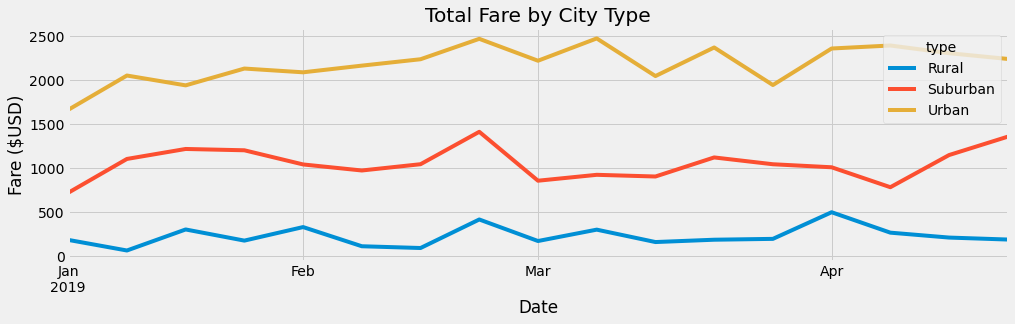

In [198]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

by_week.plot(label='type', figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Fare ($USD)")
plt.title("Total Fare by City Type")

plt.savefig("analysis/PyBer_fare_summary.png")